## Import necessary Libraries

In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import *
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import LearningCurveDisplay, learning_curve

### Load and save model

In [5]:
import pickle
# Save model
def save_model(file_name, model):
    with open('/kaggle/working/'+file_name,'wb') as f:
        pickle.dump(model,f)
    f.close()

# Load model
def load_model(file_name):
    with open('/kaggle/working/'+file_name,'rb') as f:
        model = pickle.load(f)
    f.close()
    return model

#### Plot learning curve function

In [6]:
def plot_learning_curve(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=Y_train,
                                                        cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                        n_jobs=-1)
    #
    # Calculate training and test mean and std
    #
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    #
    # Plot the learning curve
    #
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

### Load data

In [7]:
df = pd.read_csv('/kaggle/input/balance-data/balanced.csv')

### Split train and test set

In [8]:
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=random.randint(1,999))
print(X_train.shape,X_test.shape)

(8224, 37) (2056, 37)


### MISC

In [10]:
from sklearn import metrics
def print_report(clf, X_test, Y_test):
    clf_Y_pred = clf.predict(X_test)
    print(classification_report(Y_test, clf_Y_pred))
    ConfusionMatrixDisplay.from_predictions(Y_test, clf_Y_pred, normalize='true',values_format='.2f', xticks_rotation='vertical')

In [11]:

def print_accuracy(name, clf, X_test, Y_test):
    clf_Y_pred = clf.predict(X_test)
    print(f'{name} model accuracy:',metrics.accuracy_score(Y_test,clf_Y_pred))

### AdaBoost

In [12]:
from sklearn.tree import DecisionTreeClassifier

Adaboost model accuracy: 0.24659533073929962


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00       250
  Bruteforce       0.08      0.01      0.01       247
        DDos       0.30      0.41      0.35       270
         Dos       0.15      0.35      0.22       271
       Mirai       0.44      0.90      0.60       246
       Recon       0.00      0.00      0.00       236
    Spoofing       0.14      0.29      0.19       263
   Web-based       0.00      0.00      0.00       273

    accuracy                           0.25      2056
   macro avg       0.14      0.25      0.17      2056
weighted avg       0.14      0.25      0.17      2056



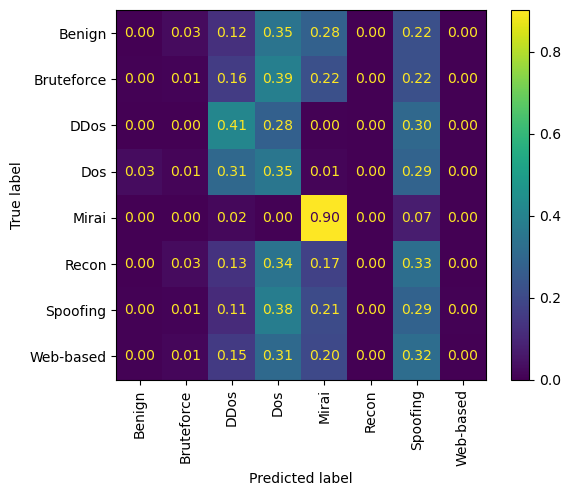

In [13]:
ADAboost_clf = make_pipeline(StandardScaler(),PCA(n_components=25), AdaBoostClassifier(n_estimators=100, learning_rate=2,random_state=0))
ADAboost_clf.fit(X_train, Y_train)
print_accuracy('Adaboost',ADAboost_clf,X_test,Y_test)
print_report(ADAboost_clf,X_test,Y_test)

Adaboost model accuracy: 0.5904669260700389
              precision    recall  f1-score   support

      Benign       0.47      0.48      0.47       250
  Bruteforce       0.41      0.45      0.42       247
        DDos       0.77      0.60      0.67       270
         Dos       0.66      0.90      0.76       271
       Mirai       0.98      0.99      0.99       246
       Recon       0.43      0.44      0.44       236
    Spoofing       0.62      0.43      0.51       263
   Web-based       0.42      0.43      0.42       273

    accuracy                           0.59      2056
   macro avg       0.60      0.59      0.59      2056
weighted avg       0.60      0.59      0.59      2056



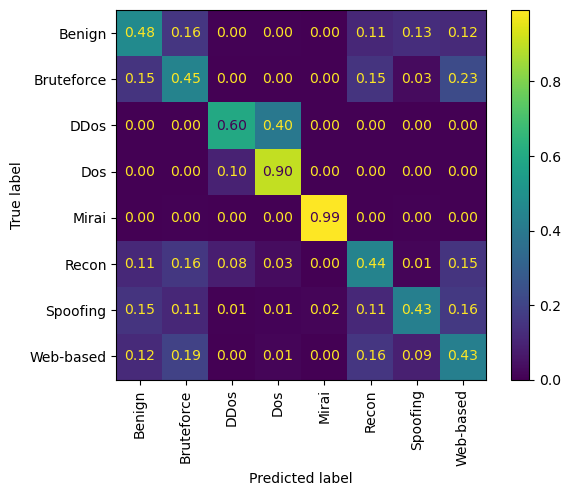

In [14]:
ADAboost_clf = make_pipeline(StandardScaler(),PCA(n_components=25), AdaBoostClassifier(n_estimators=3000, learning_rate=1.9,random_state=0))
ADAboost_clf.fit(X_train, Y_train)
print_accuracy('Adaboost',ADAboost_clf,X_test,Y_test)
print_report(ADAboost_clf,X_test,Y_test)

Adaboost model accuracy: 0.7295719844357976
              precision    recall  f1-score   support

      Benign       0.61      0.68      0.64       250
  Bruteforce       0.48      0.49      0.48       247
        DDos       0.92      0.91      0.91       270
         Dos       0.92      0.92      0.92       271
       Mirai       1.00      1.00      1.00       246
       Recon       0.59      0.58      0.59       236
    Spoofing       0.78      0.56      0.65       263
   Web-based       0.57      0.68      0.62       273

    accuracy                           0.73      2056
   macro avg       0.73      0.73      0.73      2056
weighted avg       0.74      0.73      0.73      2056



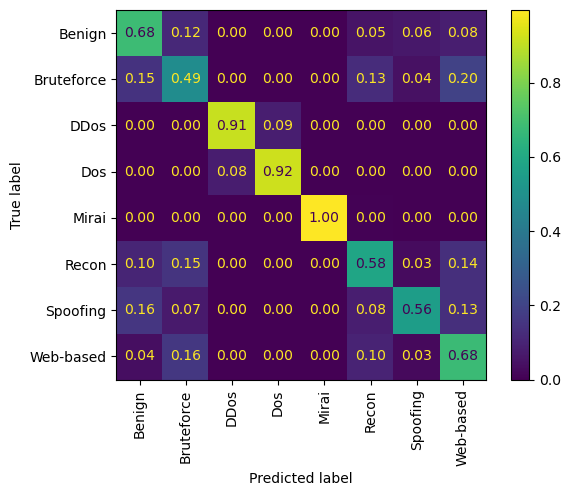

In [15]:
ADAboost_clf = make_pipeline(StandardScaler(),PCA(n_components=25), AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=13),n_estimators=300, learning_rate=1,random_state=0))
ADAboost_clf.fit(X_train, Y_train)
print_accuracy('Adaboost',ADAboost_clf,X_test,Y_test)
print_report(ADAboost_clf,X_test,Y_test)

Adaboost model accuracy: 0.7227626459143969
              precision    recall  f1-score   support

      Benign       0.59      0.65      0.62       250
  Bruteforce       0.50      0.47      0.48       247
        DDos       0.91      0.92      0.91       270
         Dos       0.92      0.90      0.91       271
       Mirai       1.00      0.99      1.00       246
       Recon       0.57      0.59      0.58       236
    Spoofing       0.72      0.57      0.63       263
   Web-based       0.58      0.67      0.62       273

    accuracy                           0.72      2056
   macro avg       0.72      0.72      0.72      2056
weighted avg       0.73      0.72      0.72      2056



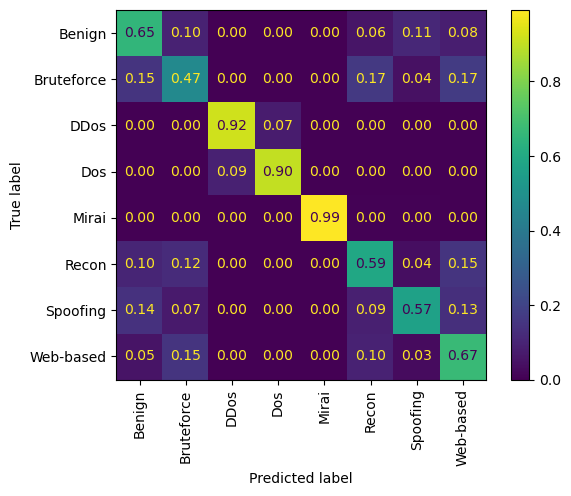

In [16]:
ADAboost_clf = make_pipeline(StandardScaler(),PCA(n_components=25), AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),n_estimators=100, learning_rate=2,random_state=0))
ADAboost_clf.fit(X_train, Y_train)
print_accuracy('Adaboost',ADAboost_clf,X_test,Y_test)
print_report(ADAboost_clf,X_test,Y_test)

Adaboost model accuracy: 0.7203307392996109
              precision    recall  f1-score   support

      Benign       0.59      0.64      0.61       250
  Bruteforce       0.49      0.48      0.48       247
        DDos       0.91      0.90      0.90       270
         Dos       0.90      0.91      0.91       271
       Mirai       1.00      1.00      1.00       246
       Recon       0.58      0.57      0.58       236
    Spoofing       0.74      0.57      0.64       263
   Web-based       0.57      0.68      0.62       273

    accuracy                           0.72      2056
   macro avg       0.72      0.72      0.72      2056
weighted avg       0.73      0.72      0.72      2056



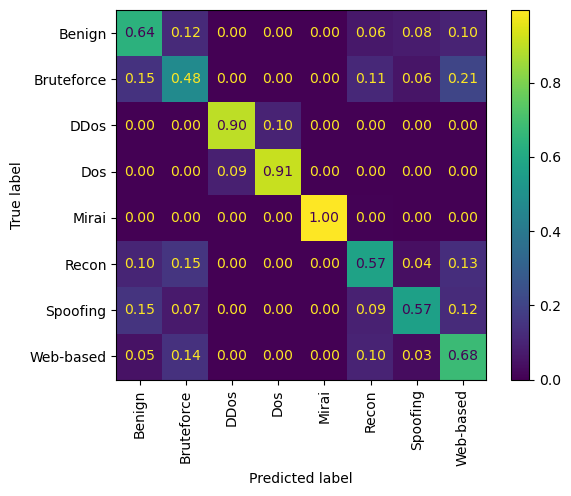

In [17]:
ADAboost_clf = make_pipeline(StandardScaler(),PCA(n_components=25), AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=17),n_estimators=300, learning_rate=0.9,random_state=0))
ADAboost_clf.fit(X_train, Y_train)
print_accuracy('Adaboost',ADAboost_clf,X_test,Y_test)
print_report(ADAboost_clf,X_test,Y_test)

In [18]:
ADAboost_clf = make_pipeline(StandardScaler(),PCA(n_components=25), AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),n_estimators=100, learning_rate=2,random_state=0))
ADAboost_clf.fit(X_train, Y_train)
save_model('ADA.pkl', ADAboost_clf)

In [19]:
ADA_pred = ADAboost_clf.predict(X_test)
print(classification_report(Y_test, ADA_pred))

              precision    recall  f1-score   support

      Benign       0.59      0.65      0.62       250
  Bruteforce       0.50      0.47      0.48       247
        DDos       0.91      0.92      0.91       270
         Dos       0.92      0.90      0.91       271
       Mirai       1.00      0.99      1.00       246
       Recon       0.57      0.59      0.58       236
    Spoofing       0.72      0.57      0.63       263
   Web-based       0.58      0.67      0.62       273

    accuracy                           0.72      2056
   macro avg       0.72      0.72      0.72      2056
weighted avg       0.73      0.72      0.72      2056

